# **FIAP Pós-Tech - IA para Devs**

## TURMA 1IADT - GRUPO 14 - ALUNOS

* Marcelo Henriques da Fonseca - RM353865
* Marcos Lopes da Silva Junior - RM353763
* Ricardo Báfica Pontes - RM353866

## TECH CHALLENGE - FASE 4

### O PROBLEMA

O Tech Challenge desta fase será a criação de uma aplicação que utilize análise de vídeo. O seu projeto deve incorporar as técnicas de reconhecimento facial, análise de expressões emocionais em vídeos e detecção de atividades.

### A PROPOSTA DO DESAFIO

Você deverá criar uma aplicação a partir do vídeo que se encontra disponível na plataforma do aluno, e que execute as seguintes tarefas:
1. **Reconhecimento facial:** Identifique e marque os rostos presentes no vídeo.
2. **Análise de expressões emocionais:** Analise as expressões emocionais dos rostos identificados.
3. **Detecção de atividades:** Detecte e categorize as atividades sendo realizadas no vídeo.
4. **Geração de resumo:** Crie um resumo automático das principais atividades e emoções detectadas no vídeo.

### O QUE ESPERAMOS COMO ENTREGÁVEL?

1. **Código Fonte:** todo o código fonte da aplicação deve ser entregue em um repositório Git, incluindo um arquivo README com instruções claras de como executar o projeto.  

2. **Relatório:** o resumo obtido automaticamente com as principais atividades e emoções detectadas no vídeo. Nesse momento esperando que o relatório inclua:
. Total de frames analisados.
. Número de anomalias detectadas.

    Observação: movimento anômalo não segue o padrão geral de atividades (como gestos bruscos ou comportamentos atípicos) esses são classificados como anômalos.

3. **Demonstração em Vídeo:** um vídeo demonstrando a aplicação em funcionamento, evidenciando cada uma das funcionalidades implementadas.

## PROJETO PROPOSTO PELOS ALUNOS

O projeto dos alunos do grupo 14 propõe a deteção de 8 emoções diferentes e 2 atividades executadas pelas pessoas, que serão reportadas não só sobre o video original, mas também registradas em 3 documentos complementares.

### AS EMOÇÕES

Detectaremos as seguintes emoções/expressões faciais presentes no vídeo:

*   "Triste"
*   "Bravo"
*   "Surpreso"
*   "Medo"
*   "Feliz"
*   "Nojo"
*   "Neutro"
*   "Careta"

Das emoções citadas, "Careta" configurará uma anomalia a ser detectada.


### AS ATIVIDADES

Detectaremos as seguintes atividades presentes no vídeo:

*   "Mão levantada"
*   "Mão no rosto"



### OS ENTREGÁVEIS

Código em python que trata o vídeo oferecido pela FIAP e gera os seguintes entregáveis:

*   Vídeo "output" baseado no vídeo original, mostrando rostos detectados, emoções detectadas e atividades detectadas
*   Arquivo com histórico **completo** das emoções/atividades detectadas no vídeo, registrando todas as emoções/atividades detectadas no vídeo
*   Arquivo com histórico **parcial** das emoções/atividades detectadas no vídeo, registrando apenas as emoções/atividades detectadas no frame mediano de cada segundo
*   Relatório resumindo as detecções realizadas no vídeo, incluindo o número total de frames analisados e o total de anomalias (caretas) detectadas

Este projeto propõe a captura de um único frame específico entre os 30 registrados a cada segundo de vídeo para a criação de um histórico parcial que seria de leitura mais fácil para um ser humano. A percepção humana de movimento contínuo ocorre a partir de 24 frames por segundo, tendo sido este o padrão básico estabelecido pela indústria cinematográfica para seus filmes. No entanto, as emoções faciais humanas tendem a permanecer estáveis por períodos superiores a 1 segundo. Por isso, acreditamos que essa abordagem pode ser eficaz para identificar mudanças significativas nas emoções, sem comprometer a precisão das informações analisadas.


## CÓDIGO EM PYTHON

Começaremos configurando o acesso ao Google Drive, que é de onde importaremos os arquivos que serão necessários para a análise e também é onde salvaremos os "outputs".

### Acesso ao Google Drive

In [6]:
# Configura acesso ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nesse bloco definimos os caminhos para os arquivos que serão acessados/criados no Google Drive.

In [7]:
# Caminho para os arquivos que serão acessados/criados

video_path          = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/Unlocking Facial Recognition_ Diverse Activities Analysis.mp4"
output_path         = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/output.mp4"
hist_parcial_path   = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/historico_parcial.csv"
hist_completo_path  = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/historico_completo.csv"
relat_path          = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/relatorio.txt"
model_path          = "/content/drive/MyDrive/FIAP/IA_para_Devs/Tech_Challenge_4/pose_landmarker_heavy.task"

### Instalação e importação de bibliotecas

Também faremos a instalação e importação de dependências necessárias para a realização do projeto.

In [8]:
# Instalação da biblioteca DeepFace para análise de expressões emocionais
!pip install deepface -q

# Instalação da biblioteca Ultralytics (YOLOv8) para detecção de atividades no vídeo
!pip install ultralytics==8.3.13 -q

# Instalação da biblioteca MediaPipe para reconhecimento facial
!pip install mediapipe==0.10.18 -q

In [9]:
# Importação da biblioteca OpenCV para processamento de vídeo e imagens
import cv2

# Importação da biblioteca NumPy para manipulação de arrays e operações matemáticas
import numpy as np

# Importação do tqdm para criar barras de progresso
from tqdm import tqdm

# Importação do DeepFace para análise de expressões emocionais
from deepface import DeepFace

# Importação da biblioteca Ultralytics (YOLOv8) para detecção de atividades
import ultralytics

# Importação da biblioteca MediaPipe para reconhecimento facial
import mediapipe as mp

# Importação da biblioteca CSV para manipulação de arquivos CSV
import csv

# Importação do PrettyTable para criação de tabelas com visualização amigável
from prettytable import PrettyTable

### Uso do MediaPipe e configuração do PoseLandmarker

Neste momento são estabelecidas as opções que serão utilizadas pela biblioteca mediapipe (abreviada como mp) para configurar e inicializar um sistema de detecção de poses humanas em imagens.  

- Definimos a confiança mínima para detectar a presença de uma pose em 0.8, o que indica que o algoritmo precisa de uma alta confiança (80%) para considerar que uma pose está presente.  

- Definimos também a confiança mínima para o rastreamento de poses em 0.8, indicando o alto nível de confiança exigido para acompanhar a posição dos pontos detectados.

In [10]:
# Instanciando as opções básicas para configurar o modelo do MediaPipe
BaseOptions = mp.tasks.BaseOptions

# Instanciando a classe PoseLandmarker para detecção de poses corporais no MediaPipe
PoseLandmarker = mp.tasks.vision.PoseLandmarker

# Instanciando as opções para configuração do PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions

# Instanciando o modo de execução do modelo para visão (imagem ou vídeo)
VisionRunningMode = mp.tasks.vision.RunningMode

# Configuração das opções do modelo de detecção de poses corporais
options = PoseLandmarkerOptions(
                base_options                    = BaseOptions(model_asset_path=model_path), # Caminho para o modelo
                running_mode                    = VisionRunningMode.IMAGE,                  # Modo de execução definido como imagem
                min_pose_presence_confidence    = 0.8,                                      # Confiança mínima para presença de pose
                min_tracking_confidence         = 0.8,                                      # Confiança mínima para rastreamento
            )

# Instanciando o objeto PoseLandmarker a partir das opções configuradas
landmarker = PoseLandmarker.create_from_options(options)

### Uso do OpenCV para captura do vídeo

Aqui é inicializada a captura do vídeo selecionado e são coletadas informações gerais do mesmo.

In [11]:
# Carrega o vídeo e extrai alguns parâmetros
cap = cv2.VideoCapture(video_path)  # Abre o vídeo especificado pelo caminho

# Extrai a taxa de quadros (frames por segundo) do vídeo
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Extrai a largura dos frames do vídeo
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Extrai a altura dos frames do vídeo
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Extrai o número total de frames no vídeo
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Exibe informações sobre o vídeo original
print(f"Total de frames do vídeo original: {total_frames}")
print(f"FPS do vídeo original: {fps}")

Total de frames do vídeo original: 3326
FPS do vídeo original: 30


Inicializamos o vídeo de saída onde serão "escritas" as emoções e atividades citadas anteriormente.

In [12]:
# Configuração do vídeo de "saída"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Define o codec de vídeo (usando "mp4v" para gerar um arquivo MP4)

# Cria um objeto para gravar o vídeo de saída com os parâmetros especificados
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))  # Define o caminho de saída, codec, FPS e resolução

Criamos duas variáveis que servirão para gravar as atividades/emoções que serão detectadas no vídeo.

In [13]:
# Inicializa listas para armazenar as atividades e emoções detectadas no vídeo
historico_parcial  = []
historico_completo = []

### Uso do FaceMesh

Neste bloco começamos inicializando o FaceMesh e o DeepFace que serão necessários para a detectação de expressões faciais.  
O FaceMesh é uma solução para detecção de pontos faciais em 3D.  

In [14]:
# Inicialização do FaceMesh para detecção de pontos faciais em 3D.
# É importante instanciar este modelo uma vez antes de usá-lo no processamento de vídeo,
# porque instanciar o modelo repetidamente pode causar lentidão.
mp_face_mesh = mp.solutions.face_mesh

# A instância `face_mesh` é configurada com os parâmetros:
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,        # - modo de imagem estática desativado, ie, o modelo irá operar em tempo real (modo dinâmico).
    max_num_faces=5,                # - número máximo de rostos a serem detectados em cada quadro de vídeo (pode ser ajustado conforme a necessidade).
    min_detection_confidence=0.5    # - nível mínimo de confiança para considerar uma detecção como válida (quanto maior, mais preciso).
    )

Também criamos alguns contadores que nos ajudarão a saber em quantos frames cada emoção aparece e que serão relevantes na hora de gerar o relatório.

In [15]:
# Criamos contadores de emoções para registrar a quantidade de cada tipo de emoção detectada no vídeo.
# O dicionário `cont_emocoes` armazena as contagens de diferentes emoções, que serão incrementadas à medida que forem detectadas.
# Estes valores serão relevantes na momento de se gerar o relatório.
cont_emocoes = {
    "cont_triste"   : 0,    # Contador de expressões faciais de tristeza
    "cont_bravo"    : 0,    # Contador de expressões faciais de raiva
    "cont_surpreso" : 0,    # Contador de expressões faciais de surpresa
    "cont_medo"     : 0,    # Contador de expressões faciais de medo
    "cont_feliz"    : 0,    # Contador de expressões faciais de felicidade
    "cont_nojo"     : 0,    # Contador de expressões faciais de nojo
    "cont_neutro"   : 0,    # Contador de expressões faciais neutras (sem emoção clara)
    "cont_careta"   : 0     # Contador de expressões faciais de careta (sem emoção específica ou expressões extremas)
}

É importante destacar que para a análise do DeepFace selecionamos o "detector_backend" como "yolov8".

Diferentes "detector_backend" apresentam performances e eficiências diferentes. Alguns detectam melhor os rostos, outros demoram menos tempo.

Após diversos testes com os diferentes "detector_backend" disponíveis, optamos por utilizar o "yolov8" pois foi o que nos gerou os melhores resultados em um tempo de processamento de vídeo razoável. Julgamos que ele seria o mais adequado para uma atividade acadêmica como esta.

### Uso do DeepFace para detectar rostos e expressões

Função detecta_rostos identifica os rostos e suas expressões.  

1. Conversão para RGB:  
O frame capturado é convertido de BGR para RGB, pois o MediaPipe e o DeepFace funcionam melhor com o formato RGB.

2. Detecção de Rostos com DeepFace:  
O modelo DeepFace é usado para detectar emoções faciais. O parâmetro detector_backend="yolov8" é escolhido para fornecer um bom equilíbrio entre precisão e desempenho. Ele é ideal para esta aplicação.

3. Análise de Emoções:  
A emoção predominante é extraída para cada rosto detectado. A tradução das emoções para o português torna a interpretação mais fácil (por exemplo, "happy" é traduzido para "feliz").

4. Detecção de Caretas com MediaPipe:  
Usamos o FaceMesh do MediaPipe para mapear pontos específicos da face (boca, olhos, etc.), a partir dos quais calculamos parâmetros como a abertura da boca e dos olhos, a proporção da boca em relação à face e a assimetria da boca.  
Se esses parâmetros indicarem uma careta, a confiança em careta é aumentada e a expressão é alterada para "careta".

5. Contagem das Emoções:  
O código conta quantas vezes cada emoção é detectada, armazenando esses dados em um dicionário cont_emocoes.

6. Desenhando a Detecção na Tela:  
Se a emoção for uma careta, um retângulo vermelho e o texto são desenhados em torno do rosto. Para outras emoções, a cor do retângulo e do texto será verde.

7. Gravação do Histórico:  
Ao final, a emoção detectada, o número do frame e o tempo são registrados no histórico, tanto completo quanto parcial (se solicitado). Isso é útil para análise posterior ou para visualizar as emoções detectadas ao longo do tempo.

8. Comentários Adicionais:  
É importante destacar que para a análise do DeepFace selecionamos o "detector_backend" como "yolov8".  
Diferentes "detector_backend" apresentam performances e eficiências diferentes. Alguns detectam melhor os rostos, outros demoram menos tempo.  
Após diversos testes com os diferentes "detector_backend" disponíveis, optamos por utilizar o "yolov8" pois foi o que nos gerou os melhores resultados em um tempo de processamento de vídeo razoável.

In [16]:
def detecta_rostos(frame):
    # Define cont_emocoes como variável global
    global cont_emocoes

    # Converte o frame da imagem para RGB, pois o MediaPipe trabalha melhor com imagens no formato RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Processa o frame usando o FaceMesh do MediaPipe para detectar os pontos faciais
    results = face_mesh.process(rgb_frame)

    # Vamos usaro DeepFace para detectar emoções/expressões faciais.
    rostos = DeepFace.analyze(
        frame,
        actions=["emotion"],        # especifica que se deseja analisar a emoção da face detectada
        enforce_detection=False,    # garante que a detecção facial não precisa ser perfeita
        detector_backend="yolov8",  # define o modelo que será usado para detectar os rostos (YoloV8 neste caso)
        align=True,
    )

    # Analise de emoções para cada rosto detectado pelo DeepFace
    for rosto in rostos:
        confianca = rosto["face_confidence"]    # grau de confiança de detecção do rosto pelo DeepFace
        if confianca < 0.7:
            continue

        # Extraímos as coordenadas do rosto detectado na imagem
        x, y, w, h = (
            rosto["region"]["x"],
            rosto["region"]["y"],
            rosto["region"]["w"],
            rosto["region"]["h"],
        )

        # Coletamos a emoção dominante identificada pelo DeepFace
        emocao = rosto["dominant_emotion"]
        if emocao == "sad":
            emocao = "triste"
        elif emocao == "angry":
            emocao = "bravo"
        elif emocao == "surprise":
            emocao = "surpreso"
        elif emocao == "fear":
            emocao = "medo"
        elif emocao == "happy":
            emocao = "feliz"
        elif emocao == "disgust":
            emocao = "nojo"
        elif emocao == "neutral":
            emocao = "neutro"

        # Detectamos caretas usando MediaPipe Face Mesh
        # Se o FaceMesh encontrar pontos faciais, tentamos calcular se a pessoa está fazendo uma careta
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:

                # Mapeamento de pontos da face
                boca_esq = face_landmarks.landmark[61]
                boca_dir = face_landmarks.landmark[291]
                boca_labio_superior = face_landmarks.landmark[13]
                boca_labio_inferior = face_landmarks.landmark[14]
                olho_esq_superior = face_landmarks.landmark[159]
                olho_esq_inferior = face_landmarks.landmark[145]
                olho_dir_superior = face_landmarks.landmark[386]
                olho_dir_inferior = face_landmarks.landmark[374]
                face_testa = face_landmarks.landmark[10]
                face_queixo = face_landmarks.landmark[152]

                # Calcula os parâmetros necessários
                altura_face = abs(face_queixo.y - face_testa.y) # tamanho vertical da face
                abertura_boca = abs(boca_labio_inferior.y - boca_labio_superior.y) # tamanho da abertura da boca (unidades absolutas)
                proporcao_boca_face = abertura_boca / altura_face # tamanho da abertura da boca em relação ao tamanho da face (proporção relativa)
                abertura_olho_esq = abs(olho_esq_inferior.y - olho_esq_superior.y)
                abertura_olho_dir = abs(olho_dir_inferior.y - olho_dir_superior.y)
                assimetria_boca = abs(boca_esq.y - boca_dir.y) # assimetria da boca (unidades absolutas)

                # Inicializamos o contador de confiança para a careta
                confianca_careta = 0

                # Avaliamos se os valores de expressões específicas são exagerados
                # Arbitramos cada limite para detecção de caretas

                # Se houver abertura expressiva da boca
                if abertura_boca > 0.03:
                    confianca_careta += 0.3
                # Se houver abertura expressiva do olho esquerdo
                if abertura_olho_esq > 0.025:
                    confianca_careta += 0.15
                # Se houver abertura expressiva do olho direito
                if abertura_olho_dir > 0.025:
                    confianca_careta += 0.15
                # Se a proporção da boca em relação ao rosto indicar exagero
                if proporcao_boca_face > 0.35:
                    confianca_careta += 0.25
                # Se houver uma assimetria consideravel na boca
                if assimetria_boca >= 0.02:
                    confianca_careta += 0.15

                # Se confiança_careta for alta, mudamos a emoção registrada para "careta"
                if confianca_careta >= 0.6:
                    emocao = "careta"

        # Incrementamos o contador da emoção detectada no dicionário `cont_emocoes`
        if f"cont_{emocao}" in cont_emocoes:
            cont_emocoes[f"cont_{emocao}"] += 1

        # Caso a emoção seja "careta", o retângulo e o texto serão vermelhos, senão serão verdes.
        cor = (0, 0, 255) if emocao == "careta" else (0, 255, 0)

        # Desenhamos um retângulo ao redor do rosto detectado
        cv2.rectangle(frame, (x, y), (x + w, y + h), cor, 2)

        # Escrevemos o nome da emoção detectada no frame
        cv2.putText(
            frame,
            emocao,
            (x + 2, y + 23),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            cor,
            2,
        )

        # Gravamos o histórico completo das emoções, número do frame e momento
        historico_completo.append([cont_frames, tempo, emocao])

        # Se necessário, grava o histórico parcial
        if gravar_historico_parcial:
            historico_parcial.append([cont_frames, tempo, emocao])

### Função para encontrar o ponto médio da mão.  


A função mao tem como objetivo calcular a posição média dos pontos relevantes de uma mão (direita ou esquerda) com base nos dados fornecidos pelo modelo MediaPipe.
Verificamos se os pontos estão ao mínimo visíveis em 50%, e retornamos a sua posição média. Caso não haja pontos válidos, a função retorna "None".

1. Parâmetros da função:  
    - landmarks: É a lista de pontos de referência (landmarks) da mão, como fornecido pelo modelo MediaPipe.
    - direita: É um parâmetro booleano que determina se a mão a ser analisada é a direita (True) ou a esquerda (False). O valor padrão é True, assumindo que a mão a ser analisada é a direita.

2. Inicialização das variáveis:  
    - x, y: Variáveis para acumular as coordenadas médias dos pontos de interesse.
    - c: Contador para o número de pontos válidos (visíveis) encontrados.

3. Definição dos pontos de interesse:  
O modelo MediaPipe usa índices específicos para representar os pontos da mão. O código define os pontos de interesse para a mão direita ou esquerda:
    - Para a mão direita, são usados os pontos 16, 18, 20 e 22.
    - Para a mão esquerda, são usados os pontos 15, 17, 19 e 21.

4. Loop for:  
    - Para cada ponto de interesse, a função verifica se ele está dentro de uma região válida, ou seja, se sua coordenada x, y está dentro do intervalo válido e se a visibilidade (visibility) do ponto é superior a 0.5 (ou seja, o ponto é suficientemente visível).
    - Se o ponto for válido, a função incrementa o contador c e acumula as coordenadas x e y desses pontos.  

5. Verificação de pontos válidos:  
Caso não haja pontos válidos (c <= 0), a função retorna None, indicando que não foi possível calcular uma posição média.

6. Cálculo das médias:  
Após identificar os pontos válidos, a função calcula a média das coordenadas x e y desses pontos, dividindo a soma das coordenadas pelo número de pontos válidos (c).

7. Retorno:  
A função retorna a posição média calculada como uma lista de duas coordenadas [x, y].

In [17]:
# função para detecção de mão
def mao(landmarks, direita = True):
    x = 0  # Inicializa a variável para a coordenada x média
    y = 0  # Inicializa a variável para a coordenada y média
    c = 0  # Conta quantos pontos visíveis são considerados

    # Definindo os pontos relevantes para a mão, dependendo se a mão é direita ou esquerda
    pontos = [16, 18, 20, 22]       # Pontos da mão direita (baseados no modelo MediaPipe)
    if not direita:
        pontos = [15, 17, 19, 21]   # Pontos da mão esquerda (baseados no modelo MediaPipe)

    # Loop para analisar os pontos definidos na lista
    for val in pontos:
        # Verifica se o ponto está dentro de uma região visível e válida
        if landmarks[val].x > 0 and landmarks[val].y > 0 and landmarks[val].visibility > 0.5:
            c += 1                  # Se o ponto for válido, incrementa o contador
            x += landmarks[val].x   # Soma a coordenada x do ponto
            y += landmarks[val].y   # Soma a coordenada y do ponto

    # Se nenhum ponto válido for encontrado, retorna None
    if c <= 0:
        return None

    # Calcula as médias das coordenadas x e y dos pontos válidos
    x /= c  # Média da coordenada x
    y /= c  # Média da coordenada y

    # Retorna a posição média dos pontos como uma lista [x, y]
    return [x, y]

### Função para calcular a distância entre dois pontos

Esta função apura a distância euclidiana entre dois pontos.  
Se ambos os pontos forem válidos, a função calcula a distância Euclidiana entre eles. A fórmula utilizada é:

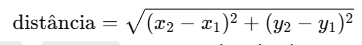

Onde (x1, y1) e (x2, y2) são as coordenadas dos pontos p1 e p2, respectivamente.

In [18]:
# função para calcular a distância entre dois pontos
def distancia(p1, p2):
    # Verifica se algum dos pontos fornecidos é None, retornando None em caso afirmativo
    if p1 is None or p2 is None:
        return None

    # Calcula a distância Euclidiana entre os pontos p1 e p2
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

### Função para detecção da posição da mão em relação a cabeça e rosto.

1. Contagem de atividades: Dois contadores são usados para rastrear atividades específicas: "mão levantada" e "mão no rosto".

2. Detecção de mãos e rosto: A função usa a biblioteca mediapipe para detectar marcos de pose no frame, identificando as posições das mãos e do rosto.

3. Processamento do rosto: Para cada rosto, calcula-se o centro e a maior distância entre dois pontos, além da posição das mãos.

4. Condicional de atividades:
    - Se a mão estiver acima da posição mais alta do rosto, é identificado como "mão levantada".
    - Se a distância entre a mão e o centro do rosto for pequena o suficiente, é identificado como "mão no rosto".

5. Exibição no frame: Usa cv2.putText() para exibir as atividades detectadas ("mão levantada" ou "mão no rosto") no frame.

6. Registro de atividades: Além da exibição no frame, o código mantém um histórico das atividades detectadas e atualiza os contadores correspondentes.

In [19]:
# contadores de atividades
cont_atividades = {
    "cont_mao_levantada": 0,    # Contador para "mão levantada"
    "cont_mao_rosto"    : 0     # Contador para "mão no rosto"
}

# função para detecção de mãos em relação ao rosto
def detecta_mao_x_rosto(frame):
    # Converte o frame de BGR (formato OpenCV padrão) para RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Processa o frame de imagem para ser compatível com a detecção do modelo
    mp_image = mp.Image(
        image_format=mp.ImageFormat.SRGB,
        data=rgb_frame
    )

    # Realiza a detecção dos marcos (landmarks) do corpo
    results = landmarker.detect(mp_image)

    # Se forem encontrados marcos de pose (como a posição dos membros), trata a posição das mãos em relação ao rosto
    if results.pose_landmarks:
        for pose_landmarks in results.pose_landmarks:
            # e coleta as posições das mãos, tanto direita quanto esquerda
            mao_direita = mao(pose_landmarks, True)
            mao_esquerda = mao(pose_landmarks, False)

            # Se não for detectada nenhuma mão, retorna sem processamento
            if mao_direita is None and mao_esquerda is None:
                return

           # Variáveis para calcular o centro do rosto, a maior distância e o ponto mais alto do rosto
            x_rosto      = 0
            y_rosto      = 0
            min_y_rosto  = 0
            max_dist     = 0  # A maior distância entre dois pontos no rosto vai servir como escala de tamanho
            cont_p_rosto = 0

            # Processa os marcos da cabeça (de 0 a 10) para encontrar o centro e a maior distância
            for i in range(0, 11):
                if pose_landmarks[i].visibility > 0.5 and pose_landmarks[i].x > 0 and pose_landmarks[i].y > 0:
                    x_rosto += pose_landmarks[i].x
                    y_rosto += pose_landmarks[i].y
                    cont_p_rosto += 1

                    if min_y_rosto == 0 or pose_landmarks[i].y < min_y_rosto:
                        min_y_rosto = pose_landmarks[i].y

                    for j in range(i + 1, 11):
                        if pose_landmarks[j].visibility > 0.5 and pose_landmarks[j].x > 0 and pose_landmarks[j].y > 0:
                            p1 = [pose_landmarks[i].x, pose_landmarks[i].y]
                            p2 = [pose_landmarks[j].x, pose_landmarks[j].y]
                            dist = distancia(p1, p2)

                            if dist is not None and dist > max_dist:
                                max_dist = dist

            # Se não houver elementos da cabeça válidos, retorna sem processamento
            if cont_p_rosto == 0:
                return

            # Calcula o centro do rosto a partir da média dos marcos
            x_rosto = x_rosto / cont_p_rosto
            y_rosto = y_rosto / cont_p_rosto

            centro_rosto = [x_rosto, y_rosto]

            # Identifica e coleta a mão mais alta, menor y positivo de uma das mãos
            x_mao_mais_alta = 0
            y_mao_mais_alta = 0
            if mao_direita is not None and mao_direita[1] > 0:
                x_mao_mais_alta = mao_direita[0]
                y_mao_mais_alta = mao_direita[1]
                if mao_esquerda is not None and  mao_esquerda[1] > 0 and mao_esquerda[1] < y_mao_mais_alta:
                    x_mao_mais_alta = mao_esquerda[0]
                    y_mao_mais_alta = mao_esquerda[1]
            elif mao_esquerda is not None and mao_esquerda[1] > 0:
                x_mao_mais_alta = mao_esquerda[0]
                y_mao_mais_alta = mao_esquerda[1]
                if mao_direita is not None and mao_direita[1] > 0 and mao_direita[1] < y_mao_mais_alta:
                    x_mao_mais_alta = mao_direita[0]
                    y_mao_mais_alta = mao_direita[1]

            # Se a mão estiver acima do rosto, o seu y sera menor que o menor y de elemento do rosto
            if y_mao_mais_alta != 0 and y_mao_mais_alta < min_y_rosto:
                cv2.putText(
                    frame,
                    "MAO LEVANTADA",    # escreve 'mão levantada' no frame
                    (int(width * x_mao_mais_alta), int(height * y_mao_mais_alta)),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.9,
                    (0, 0, 255),
                    2,
                )
                cont_atividades["cont_mao_levantada"] += 1
                historico_completo.append([cont_frames, tempo, "mao levantada"])

                if gravar_historico_parcial:
                    historico_parcial.append([cont_frames, tempo, "mao levantada"])

            # se a distância de qualquer uma das mãos até o centro do rosto for maior do que o max_dist
            # escreve 'mão no rosto' no frame
            if max_dist > 0:
                max_dist_frame = max(width, height) # valor máximo no frame

                # apura a distância da mão até o centro do rosto
                dist_mao_direita_rosto = max_dist_frame
                if mao_direita is not None:
                    dist_mao_direita_rosto = distancia(mao_direita, centro_rosto)
                dist_mao_esquerda_rosto = max_dist_frame

                if mao_esquerda is not None:
                    dist_mao_esquerda_rosto = distancia(mao_esquerda, centro_rosto)

                # Se a distância for dentro de um limite, escreve "MÃO NO ROSTO" no frame
                if dist_mao_direita_rosto is not None and dist_mao_direita_rosto <= 1.8 * max_dist:
                    cv2.putText(
                        frame,
                        "MAO NO ROSTO",
                        (int(width * mao_direita[0]), int(height * mao_direita[1])),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.9,
                        (0, 0, 255),
                        2,
                    )
                    cont_atividades["cont_mao_rosto"] += 1
                    historico_completo.append([cont_frames, tempo, "mao no rosto"])

                    if gravar_historico_parcial:
                        historico_parcial.append([cont_frames, tempo, "mao no rosto"])

                if dist_mao_esquerda_rosto is not None and dist_mao_esquerda_rosto <= 1.8 * max_dist:
                    cv2.putText(
                        frame,
                        "MAO NO ROSTO",
                        (int(width * mao_esquerda[0]), int(height * mao_esquerda[1])),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.9,
                        (0, 0, 255),
                        2,
                    )
                    cont_atividades["cont_mao_rosto"] += 1
                    historico_completo.append([cont_frames, tempo, "mao no rosto"])

                    if gravar_historico_parcial:
                        historico_parcial.append([cont_frames, tempo, "mao no rosto"])

### Loop para processamento do vídeo frame a frame.

1. Contagem de frames (cont_frames):  
Inicializa o contador de frames com 0. Para cada iteração do loop, incrementa este contador.

2. Leitura de frames:  
Usa cap.read() para ler o próximo frame do vídeo. Caso não seja possível (fim do vídeo ou erro), o loop é interrompido.

3. Gravação condicional do histórico parcial:  
O histórico parcial é gravado apenas em frames específicos: no meio do vídeo (fps//2) e depois a cada intervalo de fps frames a partir desse ponto.

4. Conversão de frames para tempo (tempo):  
Converte o número total de frames processados até o momento em tempo no formato MM:SS.

5. Funções de detecção:  
detecta_rostos(frame): Detecta rostos no frame atual.
detecta_mao_x_rosto(frame): Detecta a posição das mãos em relação ao rosto no frame atual.

6. Gravação do frame processado:  
Após processar o frame (detecção de rostos e mãos), o frame é gravado no arquivo de saída (out.write(frame)).

In [20]:
# Contador de frames
cont_frames = 0

# Loop para processaro video frame a frame
for _ in tqdm(range(total_frames), desc="Processando vídeo", total=total_frames):
    ret, frame = cap.read()  # Lê o frame do vídeo

    # Se não for possível ler o frame (ex: fim do vídeo), interrompe o loop
    if not ret:
        break

    # A contagem de frames = (tempo no vídeo em segundos) x fps
    cont_frames += 1

    # Processar apenas uma parte do vídeo se necessário
    # if cont_frames < (0 * fps):
    #     continue
    # if cont_frames > (10 * fps):
    #     break

    # Nós sempre gravamos a atividade no histórico completo
    # E tambem gravaremos a atividade no histórico parcial se o frame for o mediano (nesse caso 15) ou a cada número de "fps" (nesse caso 30) depois do mediano
    if cont_frames == (fps//2) or (cont_frames - (fps//2)) % fps == 0:
        gravar_historico_parcial = True     # Marca para gravar no histórico parcial
    else:
        gravar_historico_parcial = False    # Marca para não gravar no histórico parcial


    # Tempo em formato MM:SS
    tempo = f"{int(cont_frames / fps // 60):02d}:{int(cont_frames / fps % 60):02d}"

    # Detecta rostos no frame
    detecta_rostos(frame)

    # Detecta posição de mãos em relação ao rostos
    detecta_mao_x_rosto(frame)

    # Escreve o frame no arquivo de saída
    out.write(frame)

Processando vídeo:   0%|          | 0/3326 [00:00<?, ?it/s]

24-11-24 13:57:09 - Downloading Yolo weights from https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb to /root/.deepface/weights/yolov8n-face.pt...


Downloading...
From: https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb
To: /root/.deepface/weights/yolov8n-face.pt

  0%|          | 0.00/6.39M [00:00<?, ?B/s]
100%|██████████| 6.39M/6.39M [00:00<00:00, 49.0MB/s]


24-11-24 13:57:13 - Yolo model is just downloaded to yolov8n-face.pt
24-11-24 13:57:20 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 50.6MB/s]
Processando vídeo: 100%|██████████| 3326/3326 [46:24<00:00,  1.19it/s]


### Preparação de outputs

In [21]:
# Libera recursos
cap.release()
out.release()

Nesse bloco, criamos dois arquivos csv para gerar os arquivos de histórico parcial e completo utilizando nossas variáveis de histórico.

In [22]:
# Cria um arquivo csv para registrar o histórico parcial
with open(hist_parcial_path, "w") as f1:
    writer1 = csv.writer(f1)

    # Adiciona um linha de cabeçado com as colunas de dados
    writer1.writerow(["frame", "tempo", "atividade/emocao"])

    # Percorre o histórico de atividades para adicionar linhas ao histórico
    for row in historico_parcial:
        writer1.writerow(row)

# Cria um arquivo csv para registrar o histórico completo
with open(hist_completo_path, "w") as f2:
    writer2 = csv.writer(f2)

    # Adiciona um linha de cabeçado com as colunas de dados
    writer2.writerow(["frame", "tempo", "atividade/emocao"])

    # Percorre o histórico de atividades para adicionar linhas ao histórico
    for row in historico_completo:
        writer2.writerow(row)

### Criação do resumo detalhado das emoções e atividades detectadas no vídeo.  

1. Inicialização das variáveis:  
    - Um dicionário porcentagem_emocoes é criado para armazenar a porcentagem de cada emoção detectada no vídeo.
    - A soma total dos frames de emoções e atividades é calculada.

2. Cálculo das porcentagens:
    - Para cada tipo de emoção, a porcentagem é calculada com base no número de frames em que a emoção foi detectada, em relação ao total de frames com emoções detectadas.

3. Criação de tabelas:
    - São criadas duas tabelas: uma para as emoções detectadas, contendo o nome da emoção, a quantidade de frames e a porcentagem, e outra para as atividades (como "Mão levantada" e "Mão no rosto"), contendo o nome da atividade e a quantidade de frames.

4. Geração do relatório:
    - Um arquivo de texto (relat_path) é gerado para registrar um relatório detalhado. O relatório inclui:
        - Total de frames analisados.
        - Número de frames com anomalias (caretas).
        - Tabelas com as emoções e atividades detectadas, incluindo a contagem de frames e as porcentagens.
5. Comentario Relevante:
    - Se múltiplas emoções ou atividades forem detectadas em um único frame, o número de frames para essas emoções/atividades pode ser maior que o total de frames do vídeo.

In [23]:
# Armazenagem da porcentagem que cada emoção representa do total de emoções detectadas no vídeo
porcentagem_emocoes = {
    "porc_triste": 0,
    "porc_bravo": 0,
    "porc_surpreso": 0,
    "porc_medo": 0,
    "porc_feliz": 0,
    "porc_nojo": 0,
    "porc_neutro": 0,
    "porc_careta": 0
    }

# Soma total de frames de emoções
total_emocoes = sum(cont_emocoes.values())

# Soma total de frames de atividades
total_atividades = sum(cont_atividades.values())

# Calcula a porcentagem de cada contador
for contador, valor in cont_emocoes.items():
    porcentagem_emocoes[f"porc_{contador.split('_')[1]}"] = (valor / total_emocoes) * 100 if total_emocoes > 0 else 0


# Criando tabelas
table_emocoes = PrettyTable()
table_emocoes.field_names = ["Emoção", "Frames", "Porcentagem"]
table_emocoes.add_row(["Triste", cont_emocoes["cont_triste"], f"{porcentagem_emocoes['porc_triste']:.1f}%"])
table_emocoes.add_row(["Bravo", cont_emocoes["cont_bravo"], f"{porcentagem_emocoes['porc_bravo']:.1f}%"])
table_emocoes.add_row(["Surpreso", cont_emocoes["cont_surpreso"], f"{porcentagem_emocoes['porc_surpreso']:.1f}%"])
table_emocoes.add_row(["Medo", cont_emocoes["cont_medo"], f"{porcentagem_emocoes['porc_medo']:.1f}%"])
table_emocoes.add_row(["Feliz", cont_emocoes["cont_feliz"], f"{porcentagem_emocoes['porc_feliz']:.1f}%"])
table_emocoes.add_row(["Nojo", cont_emocoes["cont_nojo"], f"{porcentagem_emocoes['porc_nojo']:.1f}%"])
table_emocoes.add_row(["Neutro", cont_emocoes["cont_neutro"], f"{porcentagem_emocoes['porc_neutro']:.1f}%"])
table_emocoes.add_row(["Careta", cont_emocoes["cont_careta"], f"{porcentagem_emocoes['porc_careta']:.1f}%"])

table_atividades = PrettyTable()
table_atividades.field_names = ["Atividade", "Frames"]
table_atividades.add_row(["Mão levantada", cont_atividades["cont_mao_levantada"]])
table_atividades.add_row(["Mão no rosto", cont_atividades["cont_mao_rosto"]])

# Cria um arquivo txt para registrar o relatório
with open(relat_path, "w") as f3:
    f3.write("="*30 + "\n")
    f3.write("Relatório de Análise de Vídeo\n")
    f3.write("="*30 + "\n\n")
    f3.write(f"Total de frames analisados: {cont_frames}\n")
    f3.write(f"Número de frames contendo anomalias (caretas): {cont_emocoes['cont_careta']}\n\n")
    f3.write("Emoções Detectadas\n")
    f3.write(table_emocoes.get_string())  # Escreve a tabela formatada no arquivo
    f3.write("\n")
    f3.write(f"Total de frames de emoções: {total_emocoes}")
    f3.write("\n\n")
    f3.write("Contagem de Atividades\n")
    f3.write(table_atividades.get_string())  # Escreve a tabela formatada no arquivo
    f3.write("\n")
    f3.write(f"Total de frames de atividades: {total_atividades}")
    f3.write("\n\n")
    f3.write("Obs.: Os Frames nas tabelas se referem a quantidade de frames que aquela emoção/atividade foi detectada."
    + "\nLogo, se mais de uma emoção (em múltiplos rostos) ou atividade foi detectada em um frame, o total de frames de emoção/atividade aumentará em correspondência a isso."
    + "\nNão seria estranho haver mais frames de emoções/atividades do que frames totais no vídeo.")

## CONCLUSÕES

A nossa proposta de código para o Tech Challenge 4 é útil para análise de emoções e atividades não só no video proposto pela FIAP, mas também em qualquer vídeo exposto, utilizando técnicas de processamento de imagem para detectar emoções faciais e interações com movimentos das mãos.  

Ele pode ser útil em várias aplicações, incluindo:  

- Análise de Emoções: O código permite identificar e quantificar a presença de emoções como tristeza, raiva, surpresa, medo, felicidade, nojo, neutro e caretas em vídeos, proporcionando uma visão geral do comportamento emocional de indivíduos ao longo do tempo.

- Monitoramento de Atividades: Ele também permite detectar atividades específicas, como mãos levantadas e mãos no rosto a cada frame do vídeo. Esse tipo de análise pode ser aplicado em cenários como estudo de interações em ambientes corporativos, salas de aula ou até mesmo em vídeos de reuniões.

- Geração de Relatórios: O código gera relatórios detalhados sobre a análise do vídeo, registrando a quantidade de frames de emoções e atividades detectadas, bem como suas respectivas porcentagens. Isso é útil tanto para criar uma visão quantitativa das emoções e atividades ao longo do vídeo quanto para fornecer um histórico completo de como o vídeo foi analisado.

- Aplicações em Áreas Diversas: Pode ser usado em pesquisas acadêmicas sobre comportamento humano, sistemas de reconhecimento facial para segurança, análises de vídeos de treinamentos, educação, ou mesmo em marketing, para entender como as pessoas reagem emocionalmente a anúncios ou produtos.

Vale observar que, como qualquer sistema de processamento de imagem, ele apresenta algumas limitações e desafios operacionais. A seguir, destacam-se considerações importantes relacionadas à precisão, escalabilidade, flexibilidade e interatividade do código.

- Precisão e Limitações: Embora o código seja eficaz na detecção de emoções e atividades, a precisão do modelo pode ser afetada por vários fatores, como qualidade da imagem, iluminação, ângulos de captura e a diversidade de expressões faciais e movimentos de mãos. Para garantir melhores resultados, a qualidade do vídeo de entrada deve ser boa e as emoções ou atividades devem ser claramente visíveis no quadro.

- Escalabilidade: O código está estruturado para processar vídeos frame a frame. Dependendo da duração e do número de frames do vídeo, isso pode ser uma operação intensiva em termos de tempo de processamento, especialmente se o número de vídeos a serem analisados for grande.

- Flexibilidade: O código pode ser facilmente adaptado para detectar outras emoções ou atividades além das que já estão previstas, bastando adicionar novos detectores ou ajustes no processamento das imagens.

- Interatividade: Para análise em tempo real, é possível integrar esse código a sistemas que permitam a detecção contínua de emoções e atividades, como monitoramento ao vivo de reuniões ou eventos.